<a href="https://colab.research.google.com/github/evakaldy/Bootcamp_Final_Project/blob/eva_database_exploration/explore_database.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# Krok 1: Připojte Google Disk
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# Krok 2: Cesta k databázi na Google Disku
# Nahraďte 'path_to_your_database.db' skutečnou cestou k databázovému souboru na Google Disku
db_path = '/content/drive/MyDrive/Colab Notebooks/INTENSIVE_part_offline/final_project/data.db'


In [4]:
import sqlite3
import pandas as pd


# Connect to a SQLite database (or create one)
conn = sqlite3.connect(db_path)
cursor = conn.cursor()

In [5]:
# Výpis všech tabulek
cursor.execute("SELECT name FROM sqlite_master WHERE type='table';")
tables = cursor.fetchall()

# Výpis názvů tabulek
for table in tables:
    print(table[0])

Accounts
sqlite_sequence
Campaigns
Clients
Outcomes


In [6]:
# To connect the Outcomes and Campaigns tables from your SQLite database on the Campaigns.ID and Outcomes.campaign_id

query = """
SELECT
c.id AS client_id,
c.age,
c.job,
c.marital,
c.education,
a.balance,
a.in_default,
a.housing,
a.loan,
ca.duration,
ca.pdays,
ca.previous,
ca.campaign, -- Added campaigns column
o.poutcome,
o.y
FROM Clients c
JOIN Accounts a ON c.id = a.client_id
JOIN Campaigns ca ON a.id = ca.account_id
JOIN Outcomes o ON ca.id = o.campaign_id
"""
# Execute the query and fetch the result into a DataFrame
merged_df = pd.read_sql_query(query, conn)
print(merged_df.shape)
# Display the joined DataFrame
print(merged_df.head())

(45211, 15)
   client_id  age           job  marital  education  balance in_default  \
0    4815378   58    management  married   tertiary   2143.0         no   
1    5217541   44    technician   single  secondary     29.0         no   
2    6654642   33  entrepreneur  married  secondary      2.0         no   
3    1421898   47   blue-collar  married    unknown   1506.0         no   
4    2387933   33       unknown   single    unknown      1.0         no   

  housing loan  duration  pdays  previous  campaign poutcome        y  
0     yes   no       261     -1         0         1  unknown  unknown  
1     yes   no       151     -1         0         1  unknown  unknown  
2     yes  yes        76     -1         0         1  unknown  unknown  
3     yes   no        92     -1         0         1  unknown  unknown  
4      no   no       198     -1         0         1  unknown  unknown  


In [7]:
merged_df['client_id'].unique().shape
print("We do not have info about prevois campaings (eacg client_id is unique)")

We do not have info about prevois campaings (eacg client_id is unique)


In [8]:
##### CONVERT LABELS TO MUNBERS ##############

from sklearn.preprocessing import LabelEncoder
# Create a LabelEncoder instance
encoder_labels = LabelEncoder()

# Fit and transform the data into numerical labels
encoder_marital = LabelEncoder()
merged_df['marital_nr'] = encoder_marital.fit_transform(merged_df['marital'])
print('MARITAL converted to number: ')
mapping = dict(zip(encoder_marital.classes_, range(len(encoder_marital.classes_))))
print(mapping)
print()
print('--------------------------------')


encoder_job = LabelEncoder()
merged_df['job_nr'] = encoder_job.fit_transform(merged_df['job'])
print('JOB converted to number): ')
mapping = dict(zip(encoder_job.classes_, range(len(encoder_job.classes_))))
print(mapping)
print()
print('--------------------------------')

encoder_education = LabelEncoder()
merged_df['education_nr'] = encoder_education.fit_transform(merged_df['education'])
print('EDUCATION converted to number: ')
mapping = dict(zip(encoder_education.classes_, range(len(encoder_education.classes_))))
print(mapping)
print()
print('--------------------------------')

encoder_in_default = LabelEncoder()
merged_df['in_default_nr'] = encoder_in_default.fit_transform(merged_df['in_default'])
print('EDUCATION converted to number: ')
mapping = dict(zip(encoder_in_default.classes_, range(len(encoder_in_default.classes_))))
print(mapping)
print()
print('--------------------------------')

encoder_housing = LabelEncoder()
merged_df['housing_nr'] = encoder_housing.fit_transform(merged_df['housing'])
print('HOUSING converted to number: ')
mapping = dict(zip(encoder_housing.classes_, range(len(encoder_housing.classes_))))
print(mapping)
print()
print('--------------------------------')


encoder_loan = LabelEncoder()
merged_df['loan_nr'] = encoder_loan.fit_transform(merged_df['loan'])
print('LOAN converted to number: ')
mapping = dict(zip(encoder_loan.classes_, range(len(encoder_loan.classes_))))
print(mapping)
print()
print('--------------------------------')

encoder_poutcome = LabelEncoder()
merged_df['poutcome_nr'] = encoder_poutcome.fit_transform(merged_df['poutcome'])
print('POUTCOME converted to number: ')
mapping = dict(zip(encoder_poutcome.classes_, range(len(encoder_poutcome.classes_))))
print(mapping)
print()
print('--------------------------------')


encoder_y = LabelEncoder()
merged_df['y_nr'] = encoder_y.fit_transform(merged_df['y'])
print('Y converted to number: ')
mapping = dict(zip(encoder_y.classes_, range(len(encoder_y.classes_))))
print(mapping)
print()
print('--------------------------------')


print(merged_df.head())

MARITAL converted to number: 
{'divorced': 0, 'married': 1, 'single': 2}

--------------------------------
JOB converted to number): 
{'admin.': 0, 'blue-collar': 1, 'entrepreneur': 2, 'housemaid': 3, 'management': 4, 'retired': 5, 'self-employed': 6, 'services': 7, 'student': 8, 'technician': 9, 'unemployed': 10, 'unknown': 11}

--------------------------------
EDUCATION converted to number: 
{'primary': 0, 'secondary': 1, 'tertiary': 2, 'unknown': 3}

--------------------------------
EDUCATION converted to number: 
{'no': 0, 'yes': 1}

--------------------------------
HOUSING converted to number: 
{'no': 0, 'yes': 1}

--------------------------------
LOAN converted to number: 
{'no': 0, 'yes': 1}

--------------------------------
POUTCOME converted to number: 
{'failure': 0, 'other': 1, 'success': 2, 'unknown': 3}

--------------------------------
Y converted to number: 
{'no': 0, 'unknown': 1, 'yes': 2}

--------------------------------
   client_id  age           job  marital  educ

In [9]:
## REMOVE COLUMNS which are not numbers
only_nr_df = merged_df.drop(columns=['job', 'marital', 'education', 'housing', 'in_default', 'housing', 'loan', 'poutcome', 'y'], inplace=False)
only_nr_df.head()


,client_id,age,balance,duration,pdays,previous,campaign,marital_nr,job_nr,education_nr,in_default_nr,housing_nr,loan_nr,poutcome_nr,y_nr
0,4815378,58,2143.0,261,-1,0,1,1,4,2,0,1,0,3,1
1,5217541,44,29.0,151,-1,0,1,2,9,1,0,1,0,3,1
2,6654642,33,2.0,76,-1,0,1,1,2,1,0,1,1,3,1
3,1421898,47,1506.0,92,-1,0,1,1,1,3,0,1,0,3,1
4,2387933,33,1.0,198,-1,0,1,2,11,3,0,0,0,3,1


In [18]:
### DIVIDE into train_negative, train_positive and test
df_train_negative = only_nr_df[only_nr_df['y_nr'].isin([ 0])]
df_train_positive = only_nr_df[only_nr_df['y_nr'].isin([2])]
df_test = only_nr_df[only_nr_df['y_nr'].isin([1 ,3])]

df_train_positive.head()

,client_id,age,balance,duration,pdays,previous,campaign,marital_nr,job_nr,education_nr,in_default_nr,housing_nr,loan_nr,poutcome_nr,y_nr
86,4961336,56,45.0,1467,-1,0,1,1,0,1,0,0,0,3,2
1124,9306845,29,199.0,1689,-1,0,4,1,4,2,0,1,1,3,2
1416,5621406,43,388.0,2087,-1,0,2,0,4,2,0,1,0,3,2
1795,6432442,60,65.0,1028,-1,0,2,1,9,0,0,1,0,3,2
2096,5754389,32,311.0,757,-1,0,2,2,4,2,0,0,0,3,2


In [ ]:
## HISTOGRAM OF BALANCE dividaed by y
import numpy as np
bin_size = 2000
bin_edges = np.arange(filtered_df['balance'].min(), filtered_df['balance'].max() + bin_size, bin_size)

plt.figure(figsize=(10, 6))

plt.subplot(1, 2, 1)  # 1 row, 2 columns, first plot
filtered_df[filtered_df['y_nr'] == 0]['balance'].hist(bins=bin_edges, alpha=0.7, color='blue', edgecolor='black')
plt.title('balance of y=no')
plt.xlabel('balance')
plt.ylabel('Frequency')

# Histogram for 'Female'
# plt.subplot(1, 2, 2)  # 1 row, 2 columns, second plot
filtered_df[filtered_df['y_nr'] == 2]['balance'].hist(bins=bin_edges, alpha=0.7, color='pink', edgecolor='black')
# plt.title('balance of y=yes')
# plt.xlabel('balance')
# plt.ylabel('Frequency')
plt.legend(['y=no', 'y=yes'])
# Display the plots
plt.tight_layout()
plt.show()

In [22]:
import pandas as pd
from scipy import stats

# Assuming df_train_negative and df_train_positive are your two DataFrames

# Exclude 'client_id' from the list of columns for comparison
columns_to_test = ['age', 'balance', 'duration', 'pdays', 'previous',
                   'campaign', 'marital_nr', 'job_nr', 'education_nr',
                   'in_default_nr', 'housing_nr', 'loan_nr', 'poutcome_nr', 'y_nr']

# Initialize an empty dictionary to store the p-values
p_values = {}

# Loop through each column to compute the p-value
for column in columns_to_test:
    # Extract the two columns from the two DataFrames
    data_neg = df_train_negative[column]
    data_pos = df_train_positive[column]

    # Check normality (Shapiro-Wilk test)
    _, p_normal_neg = stats.shapiro(data_neg)
    _, p_normal_pos = stats.shapiro(data_pos)

    # If both distributions are normal, use t-test
    if p_normal_neg > 0.05 and p_normal_pos > 0.05:
        # t-test (for normally distributed data)
        t_stat, p_value = stats.ttest_ind(data_neg, data_pos)
    else:
        # Mann-Whitney U test (for non-normally distributed data)
        u_stat, p_value = stats.mannwhitneyu(data_neg, data_pos)

    # Store the p-value for the current column
    p_values[column] = p_value

# Convert p-values dictionary to a DataFrame for easier visualization
p_value_df = pd.DataFrame(list(p_values.items()), columns=['Column', 'p-value'])



# Interpretation of p-value:
# p-value < 0.05: Reject the null hypothesis, indicating a statistically significant difference between the two datasets for that column.
# p-value >= 0.05: Fail to reject the null hypothesis, indicating no statistically significant difference between the two datasets for that column.

stat_diff = []
for p in p_value_df['p-value']:
  if p < 0.05:
    stat_diff.append(1)  # Append 1 for statistical difference
  else:
    stat_diff.append(0)  # Append 0 for no statistical difference



p_value_df['statistically_different'] = stat_diff

# Display the p-values
print(p_value_df)





           Column        p-value  statistically_different
0             age   2.740020e-01                        0
1         balance   1.096141e-07                        1
2        duration  2.329297e-121                        1
3           pdays   5.717436e-24                        1
4        previous   1.055240e-28                        1
5        campaign   1.399791e-05                        1
6      marital_nr   1.938260e-01                        0
7          job_nr   4.404202e-02                        1
8    education_nr   1.228314e-03                        1
9   in_default_nr   9.302753e-01                        0
10     housing_nr   1.950982e-12                        1
11        loan_nr   2.127727e-06                        1
12    poutcome_nr   2.073736e-21                        1
13           y_nr   0.000000e+00                        1


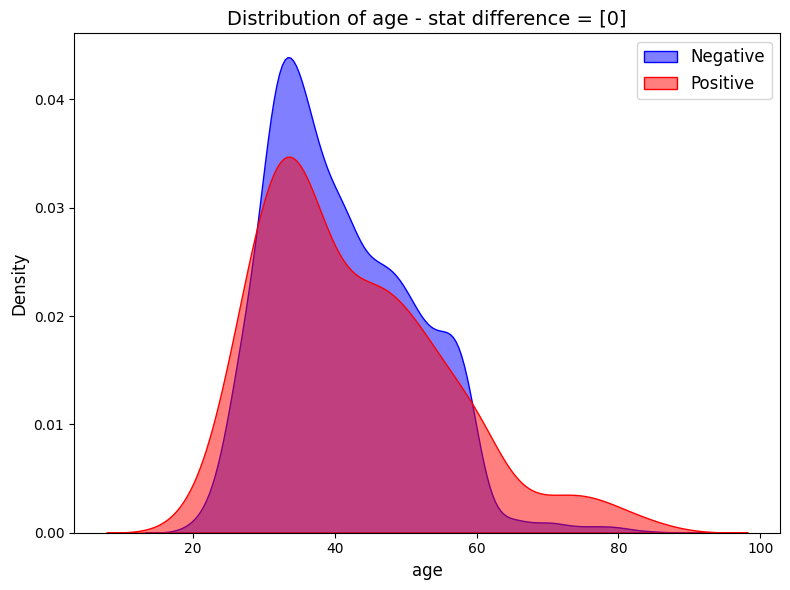

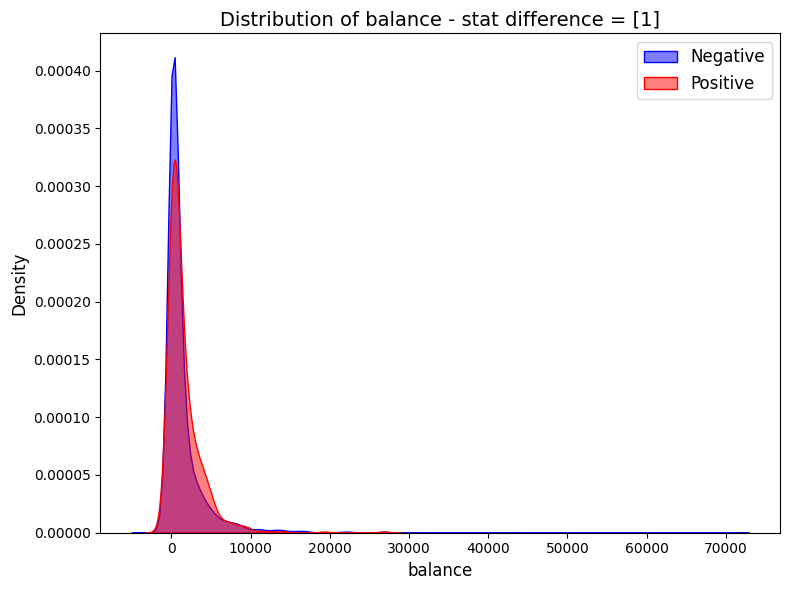

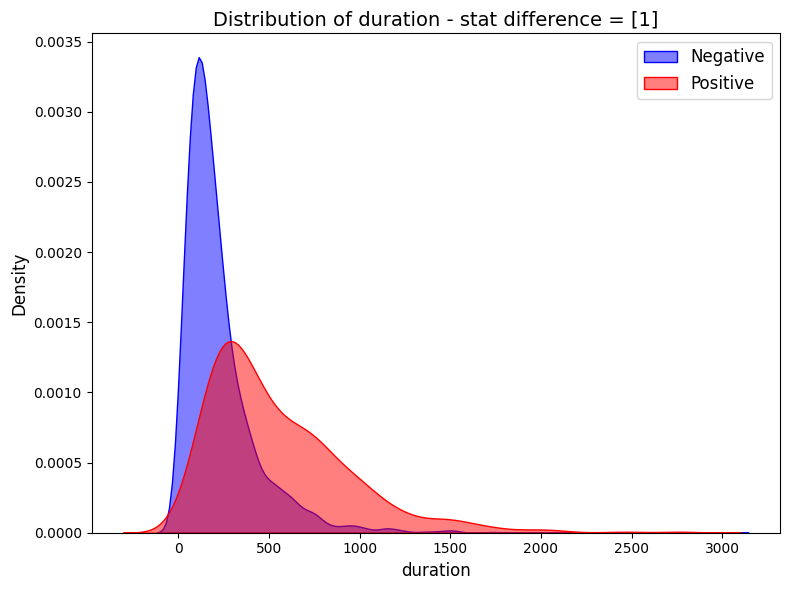

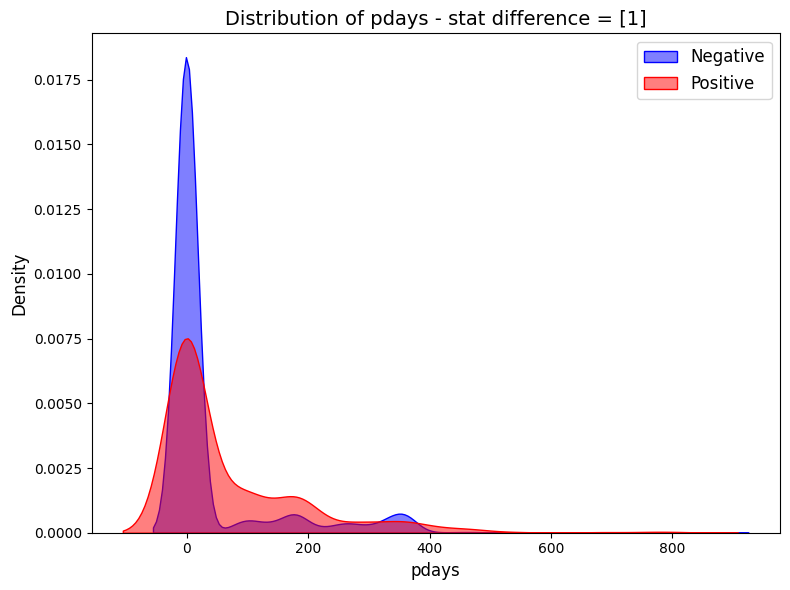

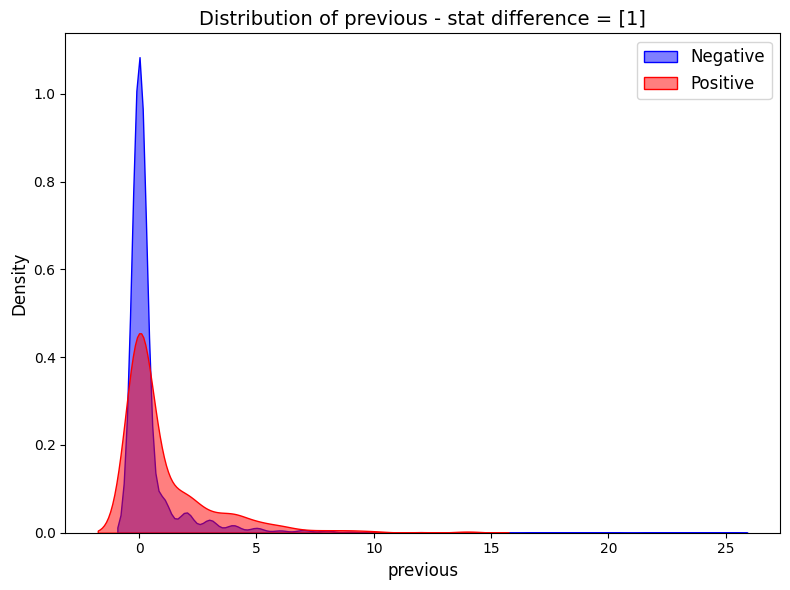

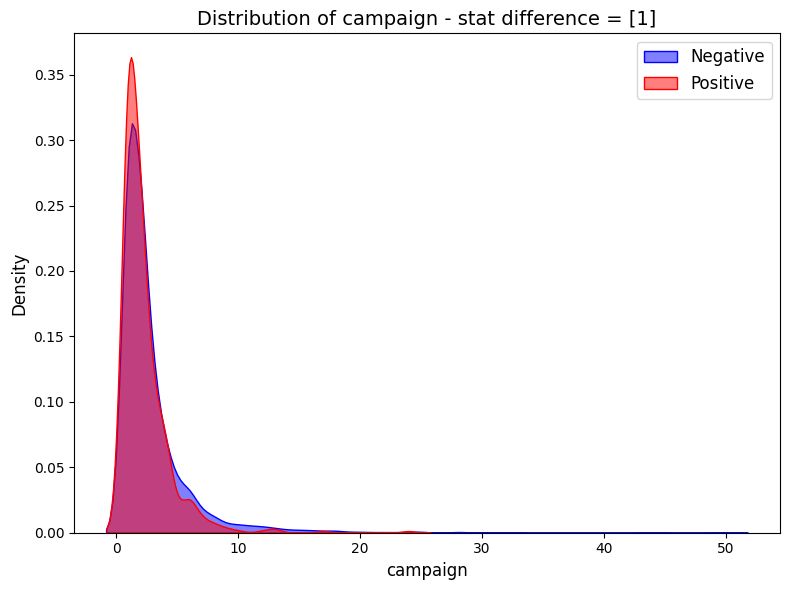

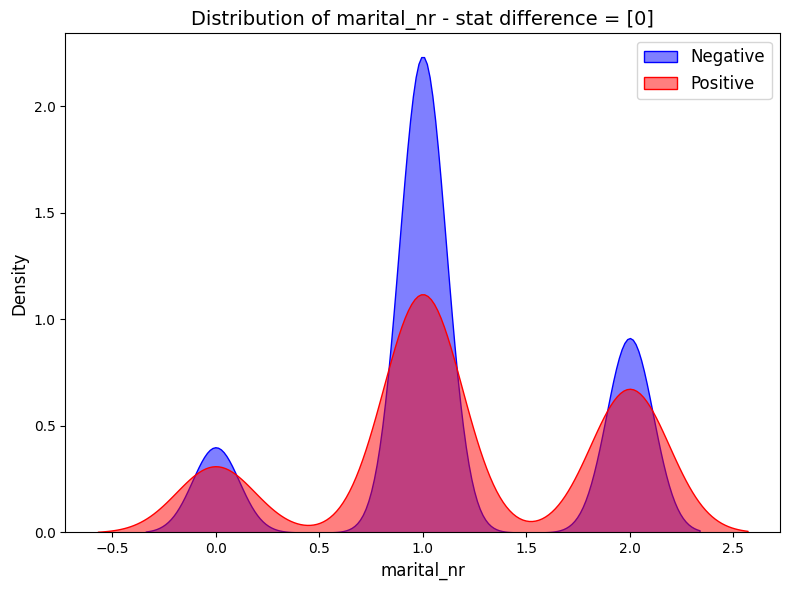

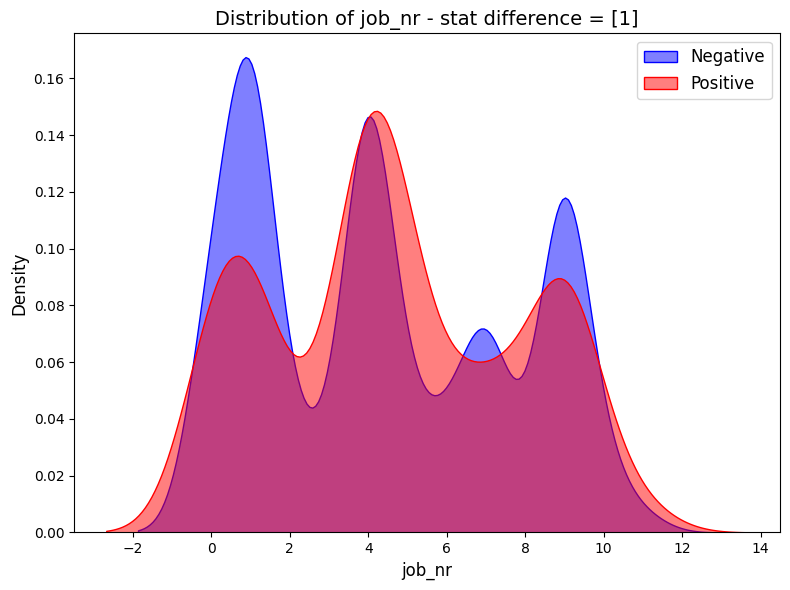

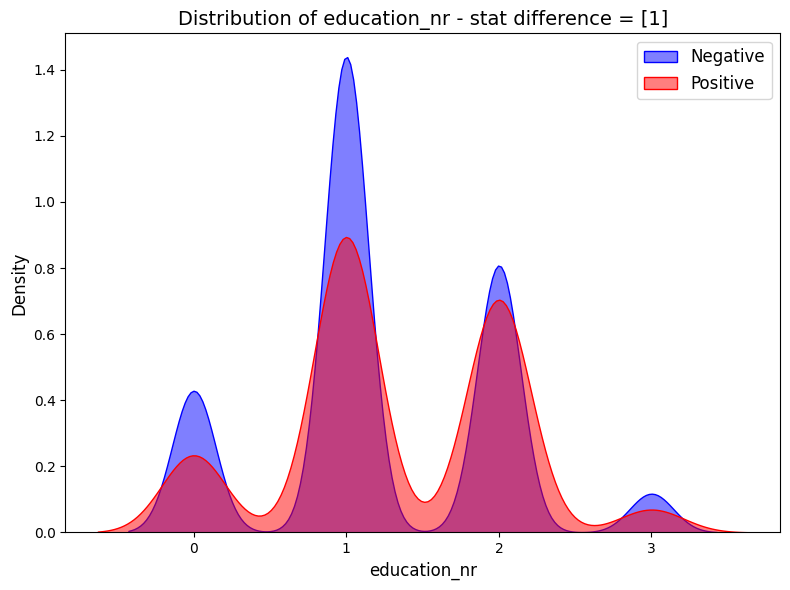

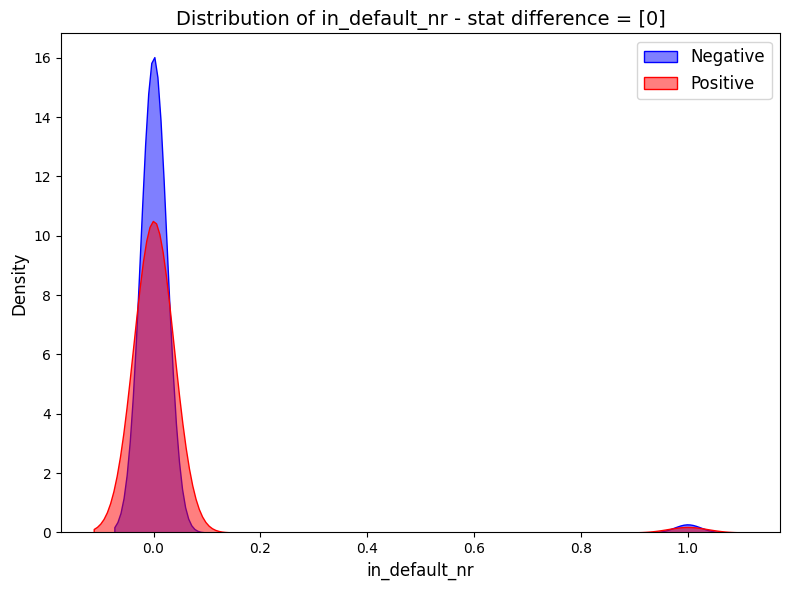

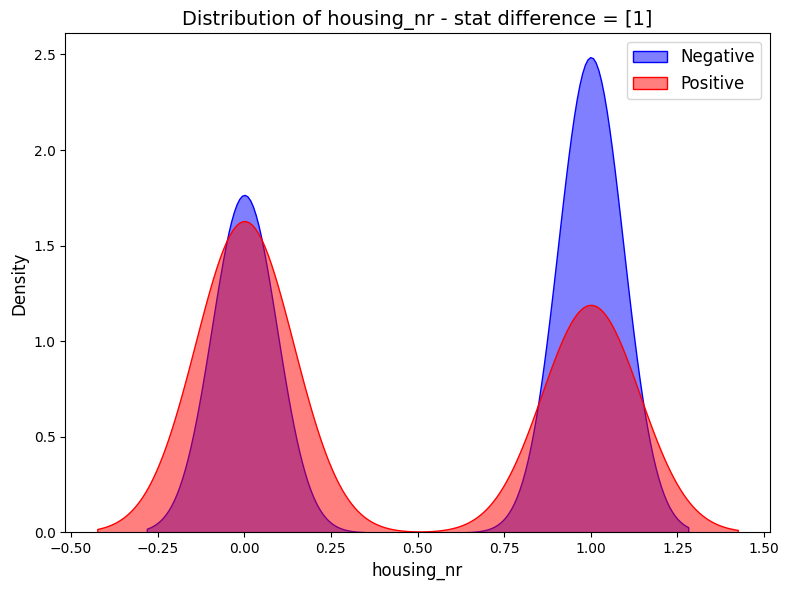

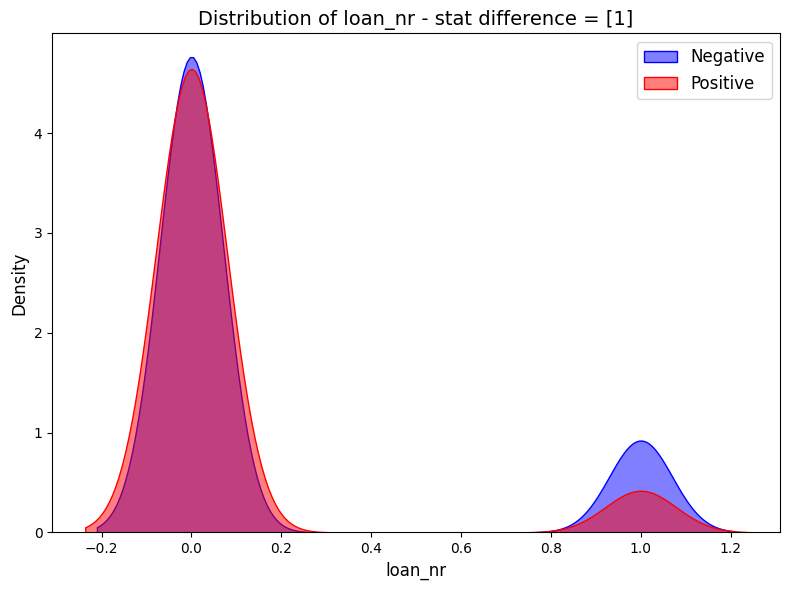

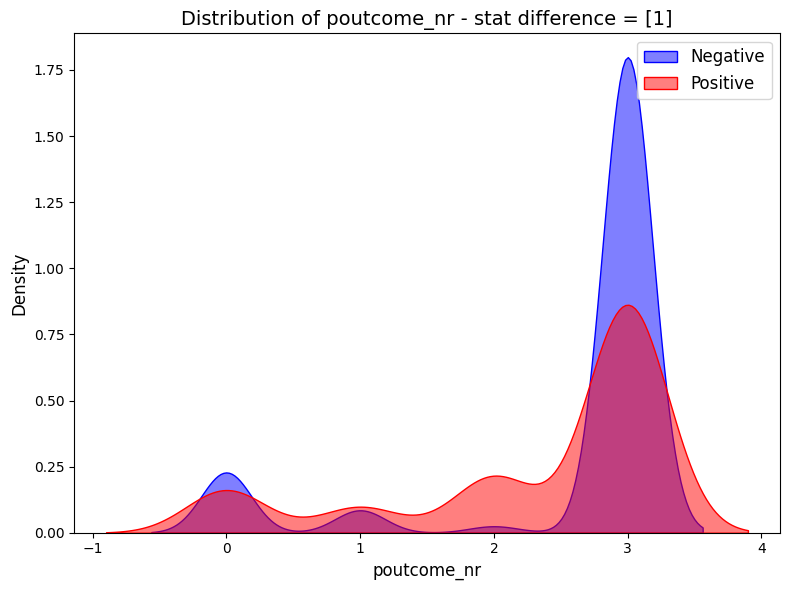

In [29]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming the dataframes `df_train_negative` and `df_train_positive` exist
columns_to_plot = ['age', 'balance', 'duration', 'pdays', 'previous',
                   'campaign', 'marital_nr', 'job_nr', 'education_nr',
                   'in_default_nr', 'housing_nr', 'loan_nr', 'poutcome_nr']

# Set up a valid Matplotlib style
# plt.style.use('seaborn-darkgrid')  # This sets the Seaborn Darkgrid style correctly

# Loop through each column and create the plots
for column in columns_to_plot:
    plt.figure(figsize=(8, 6))  # Create a new figure for each column

    # Plot histogram or density plot for df_train_negative
    sns.kdeplot(df_train_negative[column], label='Negative', color='blue', fill=True, alpha=0.5)

    # Plot histogram or density plot for df_train_positive
    sns.kdeplot(df_train_positive[column], label='Positive', color='red', fill=True, alpha=0.5)

    # Add title and labels
    plt.title(f"Distribution of {column} - stat difference = {p_value_df.loc[p_value_df['Column'] == column, 'statistically_different'].values}", fontsize=14)
    plt.xlabel(column, fontsize=12)
    plt.ylabel('Density', fontsize=12)
    plt.legend(fontsize=12)

    # Show the plot
    plt.tight_layout()
    plt.show()


In [ ]:
# conn.close()